In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [2]:
# stocks we are going to handle
stocks = ['AAPL', 'MSFT', 'TSLA', 'GE', 'AMZN', 'DB']

In [3]:
# on average there are 252 trading days in a year
no_of_trading_days = 252
# we will generate random w (different portfolios)
no_portfolios = 10000 

In [4]:
# historical data - define START and END dates
start_date = '2012-01-01'
end_date =  '2017-01-01'

In [5]:
def data_download():
    # name of the stock (key) - stock values (2010-1017) as the values
    stock_data = {}
    
    for stock in stocks:
        # closing prices
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    return pd.DataFrame(stock_data)    

In [6]:
dataset = data_download()

In [7]:
dataset

,AAPL,MSFT,TSLA,GE,AMZN,DB
Date,,,,,,
2012-01-03 00:00:00-05:00,12.519279,21.466700,1.872000,110.463104,8.951500,32.415058
2012-01-04 00:00:00-05:00,12.586558,21.971891,1.847333,111.666458,8.875500,31.438456
2012-01-05 00:00:00-05:00,12.726295,22.196421,1.808000,111.606300,8.880500,29.485252
2012-01-06 00:00:00-05:00,12.859332,22.541235,1.794000,112.207947,9.130500,27.881996
2012-01-09 00:00:00-05:00,12.838938,22.244537,1.816667,113.471413,8.928000,27.377419
...,...,...,...,...,...,...
2016-12-23 00:00:00-05:00,27.261320,58.253334,14.222667,226.915146,38.029499,17.539484
2016-12-27 00:00:00-05:00,27.434454,58.290173,14.635333,227.057495,38.570000,17.294704
2016-12-28 00:00:00-05:00,27.317471,58.023037,14.649333,225.633896,38.606499,16.871044


In [8]:
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

In [9]:
def cal_return(data):
    # NORMALIZATION - to measure all variables in comparable metric
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

In [10]:
cal_return(dataset)

,AAPL,MSFT,TSLA,GE,AMZN,DB
Date,,,,,,
2012-01-04 00:00:00-05:00,0.005360,0.023261,-0.013264,0.010835,-0.008526,-0.030591
2012-01-05 00:00:00-05:00,0.011041,0.010167,-0.021522,-0.000539,0.000563,-0.064142
2012-01-06 00:00:00-05:00,0.010399,0.015415,-0.007773,0.005376,0.027763,-0.055909
2012-01-09 00:00:00-05:00,-0.001587,-0.013250,0.012556,0.011197,-0.022428,-0.018263
2012-01-10 00:00:00-05:00,0.003574,0.003599,0.013486,-0.007451,0.004359,0.044478
...,...,...,...,...,...,...
2016-12-23 00:00:00-05:00,0.001976,-0.004890,0.023188,0.001884,-0.007532,0.004843
2016-12-27 00:00:00-05:00,0.006331,0.000632,0.028602,0.000627,0.014113,-0.014054
2016-12-28 00:00:00-05:00,-0.004273,-0.004593,0.000956,-0.006290,0.000946,-0.024802


In [11]:
log_daily_returns = cal_return(dataset)
weights = np.array([0.166,0.166,0.166,0.166,0.166,0.166])

In [12]:
print(np.sum(log_daily_returns.mean()*weights)*no_of_trading_days)
print(np.sum(log_daily_returns.mean()*no_of_trading_days*weights))

0.1758069701125246
0.17580697011252464


In [13]:
def show_mean_variance(returns,weight):
    print(np.sum(returns.mean()*no_of_trading_days*weight))
    print(np.sqrt(np.dot(weight.T, np.dot(returns.cov()*no_of_trading_days,weight))))

In [14]:
show_mean_variance(log_daily_returns,weights)

0.17580697011252464
0.1966221891239771


In [15]:
def generate_portfolios(returns):
    
    portfolio_means = []
    portfolio_risk = []    
    portfolio_weights = []
    
    for _ in range(no_portfolios): # we use '_' when we do not index in for loop
        w = np.random.random(len(stocks))
        w /= np.sum(w) # so that sum of all the weights is = 1 
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean()*w*no_of_trading_days))
        portfolio_risk.append(np.sqrt(np.dot(w.T, np.dot(returns.cov()*no_of_trading_days,w))))
    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risk)    

In [16]:
weights, means, risk = generate_portfolios(log_daily_returns)

In [17]:
def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10, 6))
    plt.scatter(volatilities, returns, c = returns / volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

In [18]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * no_of_trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()
                                                            * no_of_trading_days, weights)))
    return np.array([portfolio_return, portfolio_volatility,
                     portfolio_return / portfolio_volatility])

In [19]:
# scipy optimize module can find the minimum of a given function
# the maximum of a f(x) is the minimum of -f(x)
def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [20]:
# what are the constraints? The sum of weights = 1 !!!
# f(x)=0 this is the function to minimize
def optimize_portfolio(weights, returns):
    # the sum of weights is 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    # the weights can be 1 at most: 1 when 100% of money is invested into a single stock
    bounds = tuple((0, 1) for _ in range(len(stocks)))
    return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns
                                 , method='SLSQP', bounds=bounds, constraints=constraints)

In [21]:
def print_optimal_portfolio(optimum, returns):
    print("Optimal portfolio: ", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio: ",
          statistics(optimum['x'].round(3), returns))

In [22]:
def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize=20.0)
    plt.show()

In [23]:
pweights, means, risks = generate_portfolios(log_daily_returns)    

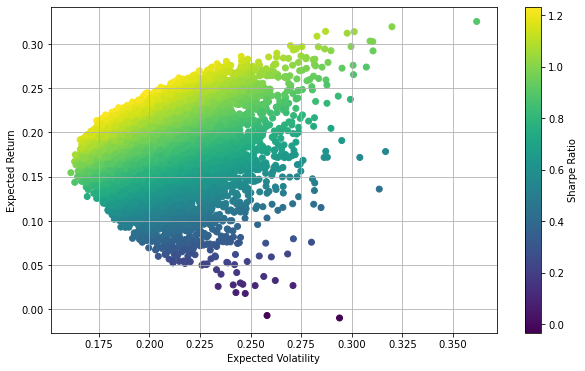

In [24]:
 show_portfolios(means, risks)
    
    

In [25]:
optimum = optimize_portfolio(pweights, log_daily_returns)

In [26]:
optimum

     fun: -1.2451255666133207
     jac: array([ 1.00837648e-03,  6.32897019e-04, -2.86832452e-04,  4.39167023e-04,
       -1.22509897e-03,  1.81180465e+00])
 message: 'Optimization terminated successfully'
    nfev: 51
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([8.93624632e-02, 2.43823673e-01, 1.45692966e-01, 2.60933578e-01,
       2.60187319e-01, 1.29368358e-15])

In [27]:
print_optimal_portfolio(optimum, log_daily_returns)

Optimal portfolio:  [0.089 0.244 0.146 0.261 0.26  0.   ]
Expected return, volatility and Sharpe ratio:  [0.23302064 0.18714636 1.24512513]


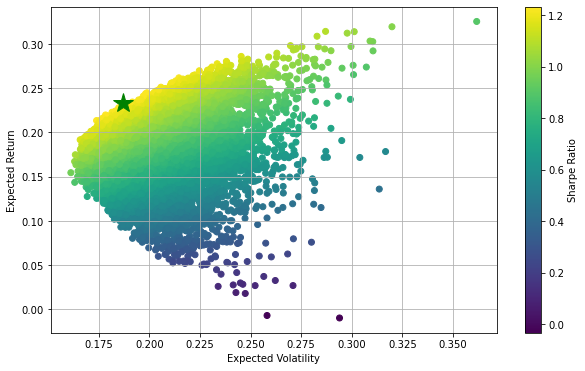

In [28]:
show_optimal_portfolio(optimum, log_daily_returns, means, risks)